This cell imports fundamental Python libraries commonly used for data science and machine learning:
- `numpy` (as `np`): Provides powerful numerical operations, especially for arrays and matrices.
- `pandas` (as `pd`): Offers data structures like DataFrames for efficient data manipulation and analysis.
- `matplotlib.pyplot` (as `plt`): A plotting library for creating static, animated, and interactive visualizations in Python.
- `seaborn` (as `sns`): A high-level data visualization library based on Matplotlib, providing a more convenient interface for drawing attractive and informative statistical graphics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This cell uses the `!pip install` command to install the `imblearn` library. This library is part of the imbalanced-learn project and is dedicated to handling imbalanced datasets, which is crucial in many classification tasks where one class heavily outnumbers the other. It includes various resampling techniques like SMOTE.

In [2]:
!pip install imblearn

This cell installs the `shap` library. SHAP (SHapley Additive exPlanations) is a game-theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using Shapley values from game theory, providing interpretability by showing how much each feature contributes to the model's prediction.

In [3]:
!pip install shap

This cell imports the `kagglehub` library, which allows direct access and download of datasets hosted on Kaggle. It then downloads the 'heart-failure-prediction' dataset, and stores the local path to the downloaded dataset in the `path` variable.

In [4]:
import kagglehub
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

Using Colab cache for faster access to the 'heart-failure-prediction' dataset.


This cell imports the `os` module, which provides a way to interact with the operating system, such as reading or writing files and directories. It then uses `os.listdir(path)` to list the contents of the directory specified by the `path` variable (where the Kaggle dataset was downloaded), confirming that the 'heart.csv' file is present.

In [5]:
import os
print(os.listdir(path))

['heart.csv']


In [6]:
data = pd.read_csv(os.path.join(path, 'heart.csv'))
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
X,y = data.drop('HeartDisease', axis=1), data['HeartDisease']

In [8]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [9]:
X.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up


In [10]:
X.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 79.0+ KB


This cell imports `train_test_split` from `sklearn.model_selection` to divide the dataset into training and testing sets.
- `X_train`, `y_train`: Used to train the machine learning model.
- `X_test`, `y_test`: Used to evaluate the model's performance on unseen data.
`test_size=0.2` allocates 20% of the data for testing, and `random_state=42` ensures reproducibility of the split.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,401
NAP,162
ATA,139
TA,32


In [14]:
X_train['RestingECG'].value_counts()

,count
RestingECG,
Normal,444
LVH,149
ST,141


In [15]:
X_train['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,431
Y,303


In [16]:
X_train['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,379
Up,307
Down,48


In [17]:
X_train['Sex'].value_counts()

,count
Sex,
M,568
F,166


This cell generates a count plot using `seaborn` to visualize the distribution of 'ChestPainType' in the `X_train` DataFrame. The `plt.show()` command displays the generated plot, making it easy to see the prevalence of each chest pain type.

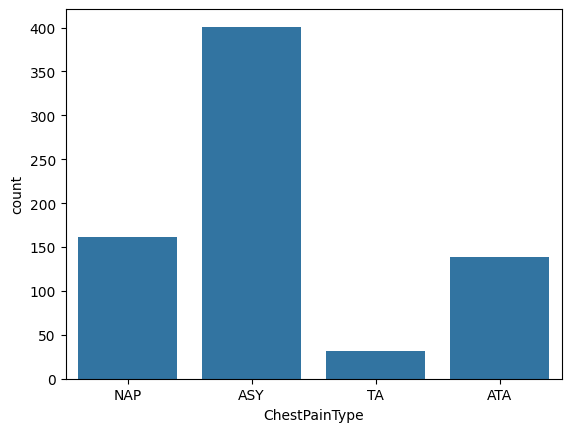

In [18]:
sns.countplot(x='ChestPainType', data=X_train)
plt.show()

This cell concatenates the `X_train` (features) and `y_train` (target variable) DataFrames column-wise (`axis=1`) to create a new DataFrame named `df_train_test`. This combined DataFrame is often useful for exploratory data analysis and visualization tasks where both features and the target variable are needed together.

In [19]:
df_train_test = pd.concat([X_train,y_train],axis = 1)

This cell generates a count plot to visualize the number of persons with and without heart disease, segmented by sex, from the `df_train_test` DataFrame.

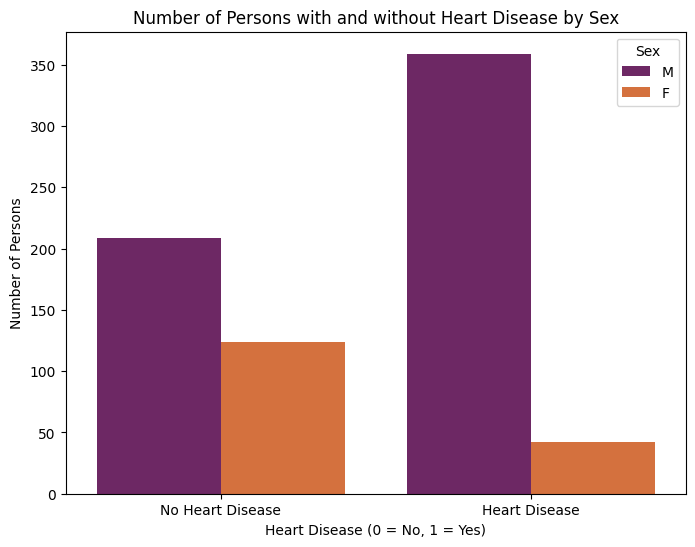

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', hue='Sex', data=df_train_test, palette='inferno')
plt.title('Number of Persons with and without Heart Disease by Sex')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Persons')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.legend(title='Sex')
plt.show()

This cell calculates and visualizes the heart disease failure rate (proportion of individuals with heart disease) broken down by sex.

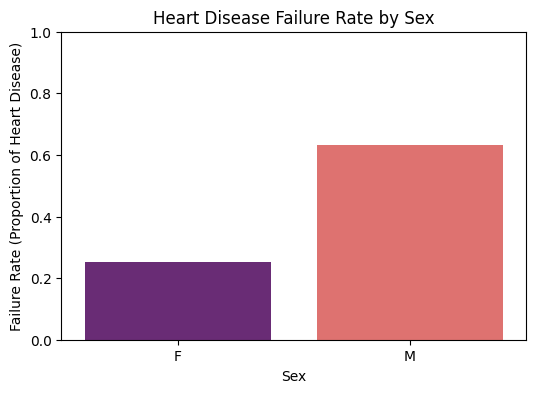

In [21]:
gender_failure_rate = df_train_test.groupby('Sex')['HeartDisease'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='HeartDisease', data=gender_failure_rate, palette='magma', hue='Sex', legend=False)
plt.title('Heart Disease Failure Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Failure Rate (Proportion of Heart Disease)')
plt.ylim(0, 1) # Failure rate is between 0 and 1
plt.show()

In [22]:
X_train['FastingBS'].value_counts()

,count
FastingBS,
0,567
1,167


In [23]:
X_train['Cholesterol'].value_counts()

,count
Cholesterol,
0,137
254,10
220,9
204,9
230,8
...,...
299,1
354,1
365,1


This cell generates histograms for all numerical features in the `X_train` DataFrame. Histograms visualize the distribution of numerical data by dividing it into bins and counting the number of observations in each bin. The `bins=20` argument sets the number of bins, and `figsize=(16,12)` sets the size of the overall plot, making it easy to inspect the distributions of all numerical features at once.

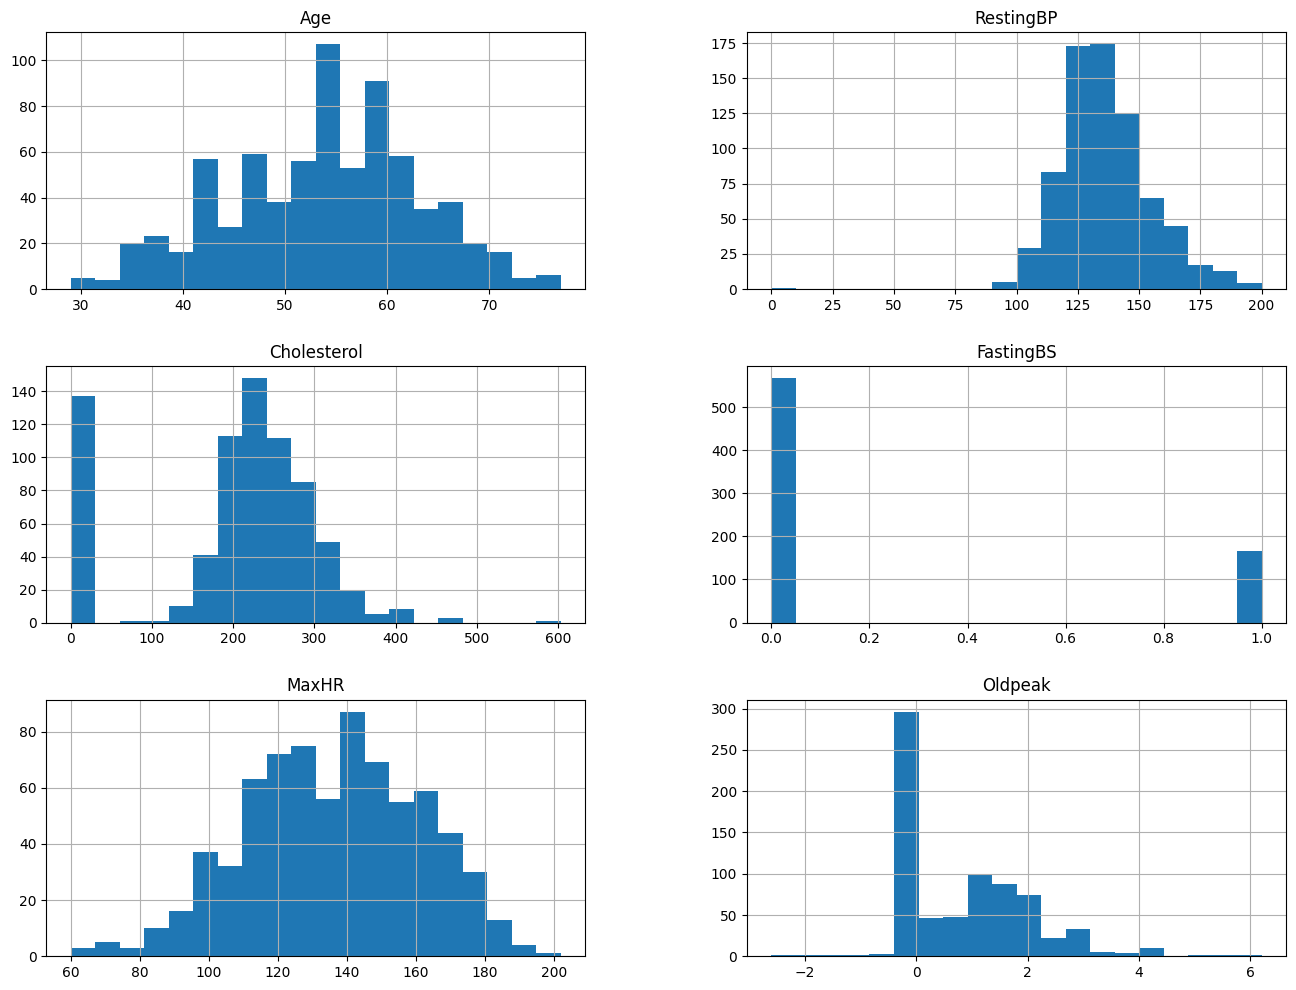

In [24]:
X_train.hist(bins = 20,figsize = (16,12))
plt.show()

This cell defines a custom scikit-learn compatible transformer named `FeatureProcessor`. This class is designed to preprocess the features (`X`) by applying various transformations:
- **Binary Mapping**: Converts specified categorical features with two unique values into numerical (0/1) representations.
- **Ordinal Mapping**: Maps specified ordinal categorical features to numerical values based on their inherent order.
- **One-Hot Encoding**: Converts nominal categorical features into a binary vector representation, creating new columns for each category.
- **Binning**: Divides continuous numerical features like 'Age' and 'Cholesterol' into discrete bins. This custom transformer ensures a consistent and reusable approach to feature engineering.

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_features=None, binary_map=None, ordinal_map=None, one_hot_features=None, binned_features=None, age_bins=None, cholesterol_bins=None):
        self.numerical_features = numerical_features if numerical_features is not None else []
        self.binary_map = binary_map if binary_map is not None else {}
        self.ordinal_map = ordinal_map if ordinal_map is not None else {}
        self.one_hot_features = one_hot_features if one_hot_features is not None else []
        self.binned_features = binned_features if binned_features is not None else {}
        self.age_bins = age_bins
        self.cholesterol_bins = cholesterol_bins
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, X, y=None):
        # Fit OneHotEncoder on specified categorical features
        if self.one_hot_features:
            self.encoder.fit(X[self.one_hot_features])
        return self

    def transform(self, X):
        X_processed = X.copy()

        # Apply binary mapping
        for feature, mapping in self.binary_map.items():
            if feature in X_processed.columns:
                X_processed[feature] = X_processed[feature].map(mapping)

        # Apply ordinal mapping
        for feature, mapping in self.ordinal_map.items():
            if feature in X_processed.columns:
                X_processed[feature] = X_processed[feature].map(mapping)

        # Apply one-hot encoding
        if self.one_hot_features:
            encoded_features = self.encoder.transform(X_processed[self.one_hot_features])
            encoded_df = pd.DataFrame(encoded_features, columns=self.encoder.get_feature_names_out(self.one_hot_features), index=X_processed.index)
            X_processed = pd.concat([X_processed.drop(columns=self.one_hot_features), encoded_df], axis=1)

        # Apply binning for Age
        if 'Age' in self.binned_features and self.age_bins is not None and 'Age' in X_processed.columns:
            X_processed['Age_binned'] = pd.cut(X_processed['Age'], bins=self.age_bins, right=True, labels=False, include_lowest=True)
            X_processed = X_processed.drop(columns=['Age'])

        # Apply binning for Cholesterol
        if 'Cholesterol' in self.binned_features and self.cholesterol_bins is not None and 'Cholesterol' in X_processed.columns:
            X_processed['Cholesterol_binned'] = pd.cut(X_processed['Cholesterol'], bins=self.cholesterol_bins, right=False, labels=False, include_lowest=True)
            X_processed = X_processed.drop(columns=['Cholesterol'])

        # Select only the features that are numerical, or have been processed
        final_columns = self.numerical_features.copy()
        if 'Age' in final_columns: final_columns.remove('Age')
        if 'Cholesterol' in final_columns: final_columns.remove('Cholesterol')

        final_columns.extend(self.binary_map.keys())
        final_columns.extend(self.ordinal_map.keys())
        if self.one_hot_features:
            final_columns.extend(self.encoder.get_feature_names_out(self.one_hot_features))
        if 'Age_binned' in X_processed.columns: final_columns.append('Age_binned')
        if 'Cholesterol_binned' in X_processed.columns: final_columns.append('Cholesterol_binned')

        # Ensure correct order of columns that were in numerical_features (excluding Age, Cholesterol)
        retained_numerical = [col for col in self.numerical_features if col not in ['Age', 'Cholesterol']]

        # Ensure the order of columns in X_processed matches the order needed by the model
        # This is crucial for consistency, especially after various transformations.
        # Collect all expected column names in the correct order.
        processed_cols = retained_numerical
        processed_cols.extend(list(self.binary_map.keys()))
        processed_cols.extend(list(self.ordinal_map.keys()))
        if self.one_hot_features:
            processed_cols.extend(self.encoder.get_feature_names_out(self.one_hot_features))
        if 'Age_binned' in X_processed.columns: processed_cols.append('Age_binned')
        if 'Cholesterol_binned' in X_processed.columns: processed_cols.append('Cholesterol_binned')

        # Filter X_processed to include only columns in processed_cols and reorder them
        # Handle cases where a column might not exist in X_processed yet (e.g., if a feature was dropped by earlier steps)
        existing_processed_cols = [col for col in processed_cols if col in X_processed.columns]
        X_processed = X_processed[existing_processed_cols]

        return X_processed

This cell initializes an instance of the `FeatureProcessor` class with specific configurations for feature engineering. It defines:
- `numerical_features_config`: List of numerical features.
- `binary_map_config`: Dictionary for binary categorical feature mapping.
- `ordinal_map_config`: Dictionary for ordinal categorical feature mapping.
- `one_hot_features_config`: List of features to be one-hot encoded.
- `binned_features_config`, `age_bins_config`, `cholesterol_bins_config`: Configurations for binning 'Age' and 'Cholesterol'. These configurations ensure the data is transformed appropriately for model training.

In [26]:
numerical_features_config = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
binary_map_config = {'Sex': {'M': 1, 'F': 0}, 'ExerciseAngina': {'Y': 1, 'N': 0}}
ordinal_map_config = {'ST_Slope': {'Up': 1, 'Flat': 0, 'Down': -1}}
one_hot_features_config = ['ChestPainType', 'RestingECG']
binned_features_config = {'Age': True, 'Cholesterol': True}
age_bins_config = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
cholesterol_bins_config = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, data['Cholesterol'].max() + 1]

feature_processor = FeatureProcessor(
    numerical_features=numerical_features_config,
    binary_map=binary_map_config,
    ordinal_map=ordinal_map_config,
    one_hot_features=one_hot_features_config,
    binned_features=binned_features_config,
    age_bins=age_bins_config,
    cholesterol_bins=cholesterol_bins_config
)

This cell applies the `fit_transform` method of the `feature_processor` to the `X_train` DataFrame. The `fit` step learns the parameters for transformations (e.g., unique categories for one-hot encoding, bin edges), and the `transform` step applies these transformations to create `X_train_processed`. This prepares the training features by applying all defined preprocessing steps.

In [27]:
X_train_processed = feature_processor.fit_transform(X_train)

This cell addresses class imbalance in the training data using SMOTE (Synthetic Minority Over-sampling Technique) from the `imblearn` library. Class imbalance can lead to models that perform poorly on the minority class.
- `SMOTE(random_state = 42, k_neighbors = 3, sampling_strategy = 1.0)`: Initializes SMOTE to balance the classes by oversampling the minority class until it matches the majority class count.
- `smote.fit_resample(X_train_processed, y_train)`: Applies SMOTE to the processed training features and target variable.
- The output prints the original and resampled distributions of `y_train`, demonstrating the effect of SMOTE in balancing the target classes.

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42,k_neighbors = 3,sampling_strategy = 1.0)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("Original y_train distribution:")
print(y_train.value_counts())
print("\nResampled y_train distribution:")
print(y_train_resampled.value_counts())

Original y_train distribution:
HeartDisease
1    401
0    333
Name: count, dtype: int64

Resampled y_train distribution:
HeartDisease
0    401
1    401
Name: count, dtype: int64


This cell displays the `X_train_resampled` DataFrame, which contains the processed and resampled training features. After applying `FeatureProcessor` and `SMOTE`, this DataFrame now has a balanced class distribution and all categorical features have been converted into numerical representations, making it ready for model training.

In [29]:
X_train_resampled

,RestingBP,MaxHR,Oldpeak,FastingBS,Sex,ExerciseAngina,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Age_binned,Cholesterol_binned
0,120,194,0.800000,1,1,0,-1,0.000000,0.00000,1.000000,0.0,0.00000,1.00000,0.0,4,4
1,130,178,0.000000,0,1,0,1,0.000000,0.00000,1.000000,0.0,0.00000,1.00000,0.0,3,4
2,150,125,1.000000,1,1,1,0,1.000000,0.00000,0.000000,0.0,0.00000,1.00000,0.0,7,4
3,130,142,0.000000,0,0,0,1,0.000000,0.00000,1.000000,0.0,0.00000,1.00000,0.0,3,4
4,120,104,0.000000,1,1,0,0,1.000000,0.00000,0.000000,0.0,0.00000,1.00000,0.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,130,138,0.000000,0,1,0,1,0.110891,0.00000,0.889109,0.0,0.00000,1.00000,0.0,3,4
798,112,142,0.056066,0,1,0,1,1.000000,0.00000,0.000000,0.0,0.00000,1.00000,0.0,4,4
799,105,167,0.000000,0,0,0,1,0.000000,1.00000,0.000000,0.0,0.00000,1.00000,0.0,3,3
800,110,159,0.166778,0,0,0,0,0.000000,0.00000,1.000000,0.0,0.00000,1.00000,0.0,6,4


This cell initializes and trains a Random Forest Classifier model.
- `RandomForestClassifier(random_state = 42)`: Creates an instance of the Random Forest model. `random_state=42` ensures reproducibility of the results.
- `rf.fit(X_train_resampled, y_train_resampled)`: Trains the Random Forest model using the resampled and processed training data. This step teaches the model to identify patterns and relationships between the features and the target variable.

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(random_state=42)

This cell performs hyperparameter tuning for the Random Forest Classifier using `GridSearchCV`.
- `param_grid`: Defines a dictionary of hyperparameters and their possible values to search over (e.g., `n_estimators`, `max_features`, `max_depth`).
- `GridSearchCV(estimator=rf, param_grid=param_grid, cv=8, scoring='roc_auc', n_jobs=-1, verbose=2)`: Initializes GridSearchCV with the Random Forest model, the parameter grid, 8-fold cross-validation, AUC as the scoring metric, parallel processing (`n_jobs=-1`), and verbose output.
- `grid_search.fit(X_train_resampled, y_train_resampled)`: Executes the grid search to find the best combination of hyperparameters that maximizes the `roc_auc` score.
- The cell then prints the `best_params_` and `best_score_` found during the grid search.

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5,10, 20],
    'min_samples_split': [2,3],
    'min_samples_leaf': [4,5,6],
    'bootstrap': [True, False],
    'criterion': ['gini','entropy'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=8, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation ROC-AUC: ", grid_search.best_score_)

Fitting 8 folds for each of 432 candidates, totalling 3456 fits
Best parameters found:  {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation ROC-AUC:  0.9434970588235294


This cell assigns the best estimator found by `GridSearchCV` to the variable `rf_best`. This `rf_best` model has the optimal hyperparameters determined during the grid search process and will be used for further evaluation and prediction.

In [32]:
rf_best  = grid_search.best_estimator_

This cell generates and plots learning curves for the `rf_best` Random Forest Classifier.
- `learning_curve()`: Computes training and cross-validation scores for different training set sizes.
- `train_sizes`, `train_scores`, `test_scores`: Outputs from the `learning_curve` function.
- `train_scores_mean`, `test_scores_mean`: Average scores across cross-validation folds.
- The plot visualizes how the model's performance on both training and validation sets changes with the amount of training data, helping to diagnose bias and variance issues.

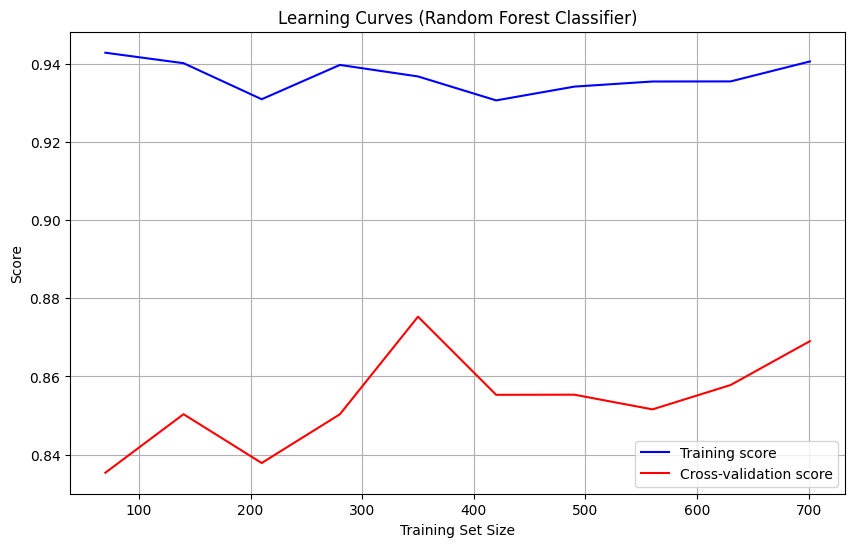

In [33]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_best, X_train_resampled, y_train_resampled, cv=8, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='red')

plt.title('Learning Curves (Random Forest Classifier)')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()
plt.legend(loc='best')
plt.show()

This cell extracts and sorts feature importances from the trained `rf_best` Random Forest Classifier.
- `rf_best.feature_importances_`: Retrieves the importance score for each feature.
- `pd.Series(...)`: Converts these importances into a pandas Series, indexed by the feature names from `X_train_resampled.columns`.
- `.sort_values(ascending=False, inplace=True)`: Sorts the features in descending order of importance, making it easy to identify the most influential features.

In [34]:
feature_importances = pd.Series(rf_best.feature_importances_, index=X_train_resampled.columns)
feature_importances.sort_values(ascending=False, inplace=True)

This cell visualizes the feature importances obtained from the `rf_best` Random Forest Classifier.
- `plt.figure(figsize=(10, 6))`: Sets the size of the plot.
- `sns.barplot(...)`: Creates a bar plot where the length of each bar represents the importance of a feature, and features are ordered from most to least important.
- `plt.title`, `plt.xlabel`, `plt.ylabel`: Adds labels and a title for clarity.
- `plt.show()`: Displays the plot, providing a clear visual representation of which features contributed most to the model's predictions.

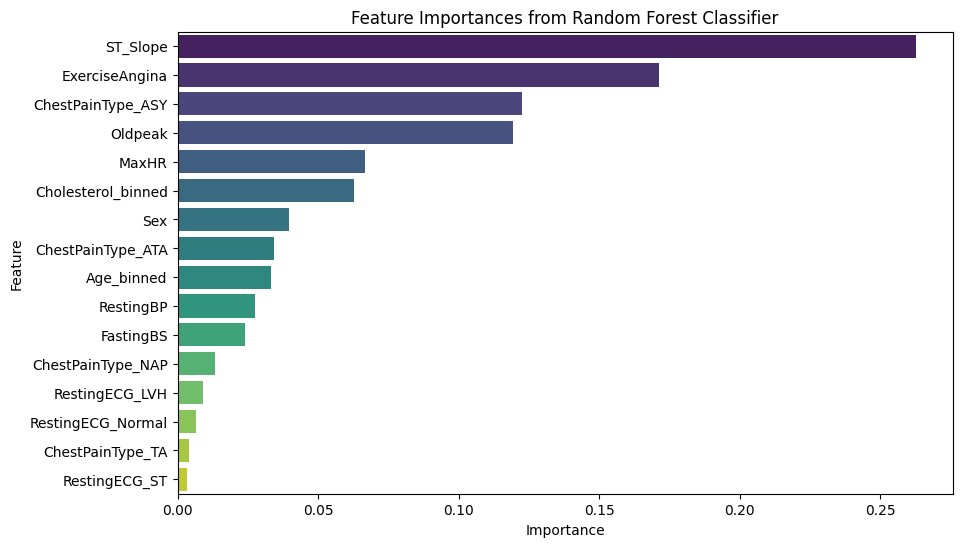

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis', hue=feature_importances.index, legend=False)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

This cell evaluates the performance of the `rf_best` model using cross-validation within an `imblearn.pipeline.Pipeline`.
- `Pipeline(...)`: Combines the SMOTE oversampling step and the Random Forest model into a single pipeline, ensuring SMOTE is applied correctly within each cross-validation fold to prevent data leakage.
- `cross_val_score(...)`: Computes cross-validated accuracy scores for the pipeline on the `X_train_processed` data and `y_train` labels across 8 folds.
- The output `rf_best_cvs` shows the accuracy scores for each fold.

In [36]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=3)),
    ('model', rf_best)
])

rf_best_cvs = cross_val_score(
    pipeline,
    X_train_processed,
    y_train,
    cv=8,
    scoring='accuracy'
)

rf_best_cvs


array([0.93478261, 0.83695652, 0.91304348, 0.84782609, 0.84782609,
       0.79347826, 0.89010989, 0.84615385])

In [37]:
rf_best_cvs.mean()*100

np.float64(86.37720974677497)

This cell uses `cross_val_predict` to obtain predicted probabilities for the positive class (HeartDisease=1) on the training set using 8-fold cross-validation.
- `method='predict_proba'`: Ensures that probabilities rather than direct class labels are returned.
- This `y_train_prob` array is crucial for analyzing the model's probability predictions, especially for tasks like plotting precision-recall curves or setting custom thresholds.

In [38]:
from sklearn.model_selection import cross_val_predict

y_train_prob = cross_val_predict(
    pipeline,
    X_train_processed,
    y_train,
    cv=8,
    method='predict_proba'
)


This cell defines a `threshold` variable and sets its initial value to 0.5. This threshold is typically used to convert predicted probabilities into binary class labels (0 or 1), where probabilities above this value are classified as the positive class.

In [39]:
threshold = 0.5

This cell generates and visualizes the Precision-Recall curve for the model's predictions on the training data.
- `precision_recall_curve()`: Computes precision, recall, and corresponding probability thresholds.
- The plot shows precision and recall values across different classification thresholds.
- `plt.vlines()`: Draws a vertical line at the default `threshold` of 0.5 to indicate its position relative to precision and recall.
- This curve is especially useful for evaluating binary classifiers on imbalanced datasets.

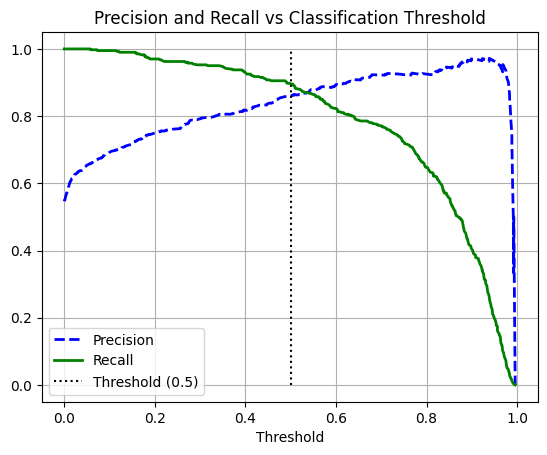

In [40]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train,y_train_prob[:,1])
plt.plot(thresholds,precisions[:-1],'b--',label = 'Precision',linewidth = 2)
plt.plot(thresholds,recalls[:-1],'g-',label = 'Recall',linewidth = 2)
plt.vlines(threshold,0,1,'k','dotted',label = 'Threshold (0.5)')
plt.xlabel('Threshold')
plt.title("Precision and Recall vs Classification Threshold")
plt.grid(True)
plt.legend()
plt.show()

This cell plots the Precision-Recall curve directly, with Recall on the x-axis and Precision on the y-axis. This representation helps in understanding the trade-off between precision and recall at various decision thresholds, without explicitly showing the thresholds themselves. A curve closer to the top-right corner indicates better performance.

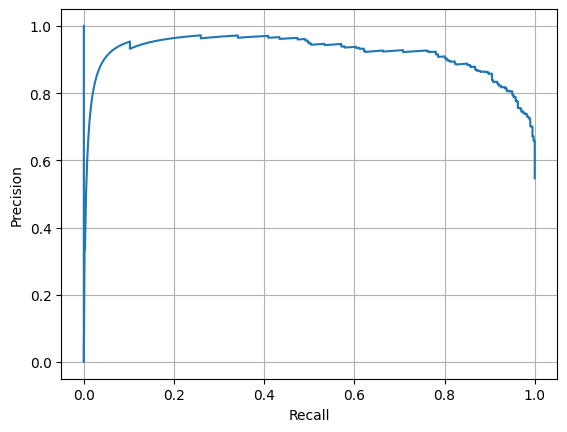

In [41]:
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

This cell iterates through the calculated precision-recall `thresholds` to find a new optimal threshold.
- It aims to find a threshold where both precision and recall are above specific desired values (0.85 for precision and 0.86 for recall).
- If such a threshold is found, it prints the threshold, precision, and recall, and updates `new_threshold`.
- If no such threshold meets the criteria, it prints a message indicating that no suitable threshold was found. This helps in fine-tuning the model's decision boundary for specific performance goals.

In [42]:
new_threshold = threshold
for i in range(len(thresholds)):
    if precisions[i] >= 0.85 and recalls[i] >= 0.86:
        print(f"Threshold: {thresholds[i]:.2f}, Precision: {precisions[i]*100:.2f}%, Recall: {recalls[i]*100:.2f}%")
        new_threshold = thresholds[i]
        print(f"New threshold: {new_threshold:.2f}")
        break

else:
    print("No threshold found")

Threshold: 0.47, Precision: 85.01%, Recall: 90.52%
New threshold: 0.47


This cell uses the `new_threshold` found in the previous step to convert the predicted probabilities (`y_train_prob[:, 1]`) into binary class labels for the training set. Any probability greater than or equal to the `new_threshold` is classified as 1 (positive class), otherwise 0 (negative class). The resulting `y_train_pred_new_threshold` array represents the model's binary predictions on the training data using the optimized threshold.

In [43]:
y_train_pred_new_threshold = (y_train_prob[:, 1] >= new_threshold).astype(int)
y_train_pred_new_threshold

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,

This cell applies the `transform` method of the `feature_processor` to the `X_test` DataFrame. Unlike `fit_transform`, `transform` only applies the previously learned transformations (e.g., scaling, one-hot encoding mappings, binning definitions) to the test data. This ensures consistency between how the training and test data are preprocessed, preventing data leakage from the test set.

In [44]:
X_test_processed = feature_processor.transform(X_test)

This cell renames `X_test_processed` to `X_test_resampled` and `y_test` to `y_test_resampled`. This is likely a naming convention choice to maintain consistency with how the training data was named after SMOTE, even though SMOTE is typically not applied to the test set to avoid data leakage during evaluation.

In [45]:
X_test_resampled = X_test_processed
y_test_resampled = y_test

In [46]:
X_test_resampled

,RestingBP,MaxHR,Oldpeak,FastingBS,Sex,ExerciseAngina,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Age_binned,Cholesterol_binned
668,140,179,0.0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,3
30,145,130,0.0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6,10
377,160,122,1.2,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8,0
535,130,122,1.0,0,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0
807,108,156,0.0,0,1,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,140,140,0.0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5,5
745,108,169,1.8,0,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8,5
584,141,116,1.5,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8,4
878,130,171,0.6,0,1,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5,5


This cell uses the trained `rf_best` Random Forest model to predict the class probabilities for the processed test set (`X_test_resampled`). The `predict_proba()` method returns a 2D array where each row corresponds to a sample, and each column represents the probability of that sample belonging to a particular class (e.g., column 0 for class 0, column 1 for class 1).

In [47]:
y_prob = rf_best.predict_proba(X_test_resampled)
y_prob

array([[8.71108693e-01, 1.28891307e-01],
       [2.91364867e-01, 7.08635133e-01],
       [5.52622378e-02, 9.44737762e-01],
       [4.21302019e-02, 9.57869798e-01],
       [9.82533325e-01, 1.74666752e-02],
       [3.67607839e-01, 6.32392161e-01],
       [2.13900178e-01, 7.86099822e-01],
       [8.27840690e-01, 1.72159310e-01],
       [4.14470164e-01, 5.85529836e-01],
       [6.69377589e-02, 9.33062241e-01],
       [4.73020977e-01, 5.26979023e-01],
       [8.19859088e-01, 1.80140912e-01],
       [2.05249820e-01, 7.94750180e-01],
       [7.40941554e-01, 2.59058446e-01],
       [1.80069053e-01, 8.19930947e-01],
       [2.69718007e-01, 7.30281993e-01],
       [9.06018211e-01, 9.39817888e-02],
       [1.63541809e-01, 8.36458191e-01],
       [3.78770305e-01, 6.21229695e-01],
       [7.34824555e-01, 2.65175445e-01],
       [3.76739772e-01, 6.23260228e-01],
       [1.88190519e-01, 8.11809481e-01],
       [9.84558442e-01, 1.54415582e-02],
       [5.78314394e-01, 4.21685606e-01],
       [1.045668

This cell generates and displays a histogram of the predicted probabilities for the positive class (`y_prob[:,1]`) on the test set.
- `plt.hist(y_prob[:,1], bins=20)`: Creates a histogram with 20 bins to show the distribution of the predicted risk scores.
- `plt.xlabel`, `plt.ylabel`, `plt.title`: Add labels and a title for clarity.
- `plt.show()`: Displays the histogram, which can help assess the model's confidence in its predictions and identify potential calibration issues.

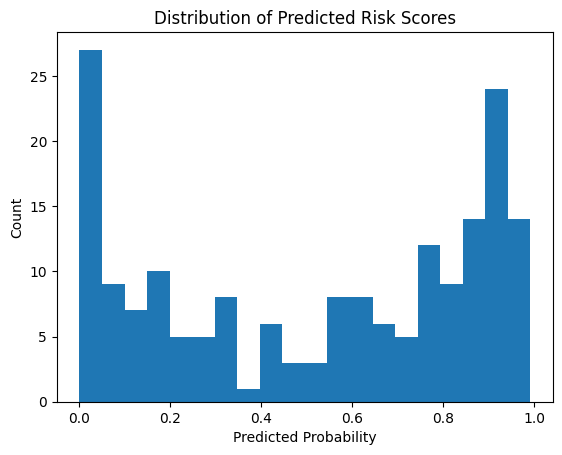

In [48]:
plt.hist(y_prob[:,1], bins=20)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Distribution of Predicted Risk Scores")
plt.show()

This cell generates and plots a calibration curve (also known as a reliability diagram) for the optimized Random Forest Classifier on the test set.
- `calibration_curve()`: Computes `fraction_of_positives` (observed frequencies) and `mean_predicted_value` (predicted probabilities) across different bins.
- The plot compares the predicted probabilities to the actual proportion of positive cases. A perfectly calibrated model would have its curve along the diagonal line (`'Perfectly calibrated'`). Deviations indicate miscalibration.
- This plot helps to assess how well the model's predicted probabilities reflect true probabilities.

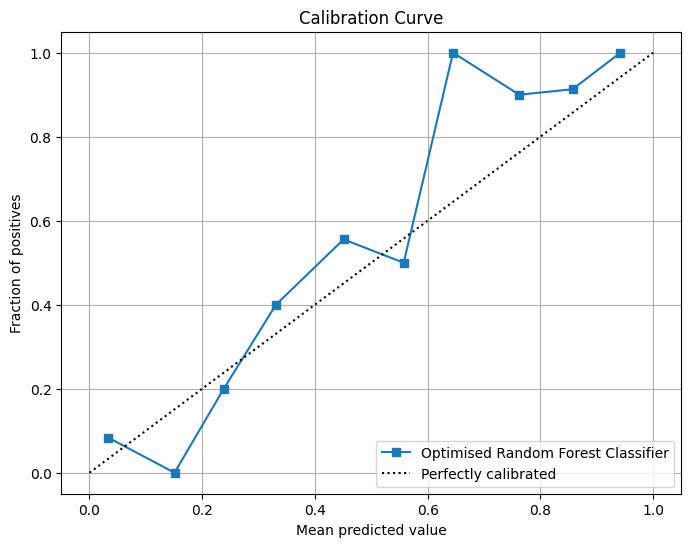

In [49]:
from sklearn.calibration import calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob[:,1], n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Optimised Random Forest Classifier")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

This cell applies the `new_threshold` (determined during the training phase based on precision-recall trade-offs) to the predicted probabilities of the test set (`y_prob[:, 1]`). Probabilities greater than or equal to this threshold are classified as 1 (positive class), otherwise 0 (negative class). The resulting `y_predicted` array contains the final binary predictions for the test data.

In [50]:
y_predicted = (y_prob[:, 1] >= new_threshold).astype(int)
y_predicted

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

These cells calculate and display various performance metrics for the model on the test set:

- **Accuracy Score**: Represents the proportion of total predictions that were correct. It's calculated as (True Positives + True Negatives) / Total Samples.

- **Precision Score**: Indicates the proportion of positive identifications that were actually correct. It's calculated as True Positives / (True Positives + False Positives). High precision relates to a low false positive rate.

- **Recall Score**: (also known as Sensitivity) Represents the proportion of actual positives that were correctly identified. It's calculated as True Positives / (True Positives + False Negatives). High recall relates to a low false negative rate.

- **F1-Score**: The harmonic mean of Precision and Recall. It tries to find the balance between precision and recall, especially useful for uneven class distribution. It's calculated as 2 * (Precision * Recall) / (Precision + Recall).

- **ROC AUC Score**: The Area Under the Receiver Operating Characteristic Curve. It measures the ability of the classifier to distinguish between classes. A higher AUC indicates a better model performance in separating positive and negative classes.

- **Log Loss**: Measures the performance of a classification model where the prediction input is a probability value between 0 and 1. It heavily penalizes confident incorrect predictions. Lower values of log loss indicate better prediction.

- **Cohen's Kappa Score**: Measures the agreement between two raters (the true labels and the model's predictions), accounting for the possibility of agreement occurring by chance. A value of 1 indicates perfect agreement, while 0 indicates agreement equivalent to chance.

- **Matthews Correlation Coefficient (MCC)**: A single, balanced measure that can be used even if the classes are of very different sizes. It takes into account true and false positives and negatives and is generally regarded as a reliable statistical rate.

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)*100

88.04347826086956

In [52]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predicted)*100

90.47619047619048

In [53]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predicted)*100

88.78504672897196

In [54]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predicted)*100

89.62264150943396

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob[:,1])

np.float64(0.941740502488166)

In [56]:
from sklearn.metrics import log_loss
log_loss(y_test,y_prob)

0.3310071589590498

In [57]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_predicted)

np.float64(0.7552303785221913)

In [58]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test,y_predicted)

np.float64(0.7554174210796076)

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[67, 10],
       [12, 95]])

### **Confusion Matrix**

This cell generates and displays a confusion matrix for the model's predictions on the test set. The confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa.

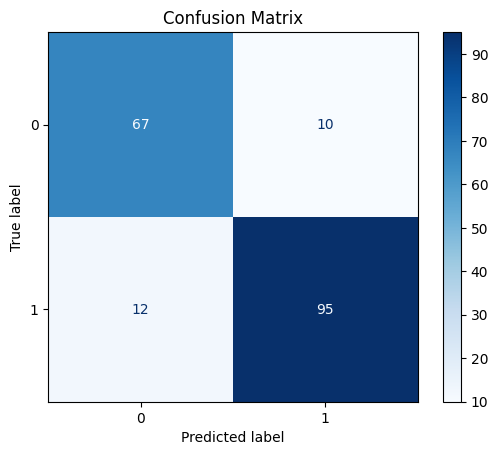

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm,display_labels= rf_best.classes_)
cmd.plot(cmap = plt.cm.Blues )
plt.title('Confusion Matrix')
plt.show()

### **ROC Curve**
This plot displays the Receiver Operating Characteristic (ROC) curve. It shows the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold settings. The diagonal line represents a random classifier, and a curve that hugs the top-left corner indicates a better performing model. The area under this curve (ROC AUC) was previously calculated and is a key metric for classifier performance.

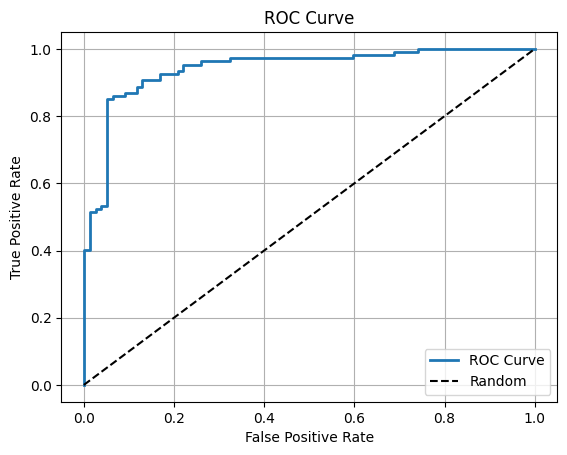

In [61]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
plt.plot(fpr,tpr,linewidth = 2,label = 'ROC Curve')
plt.plot([0,1],[0,1],'k--',label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()

### **Cumulative Gain Curve**
This plot illustrates the cumulative gain curve, which helps assess the effectiveness of a classification model. It shows the percentage of target instances (positives) found by selecting a certain percentage of the population, ordered by the model's predicted probability. A curve significantly above the 'Random' line indicates that the model is effectively identifying positive cases.

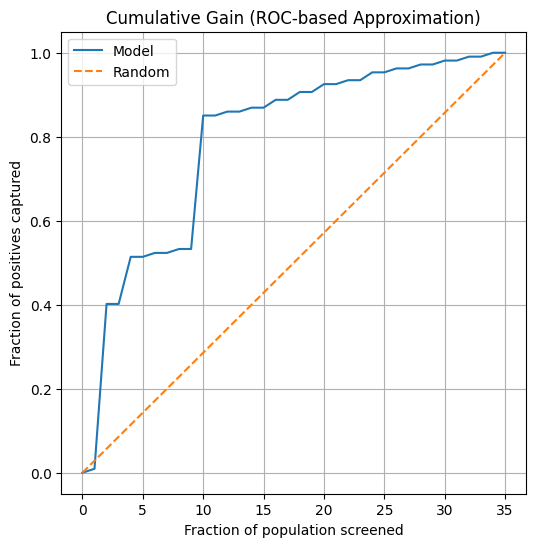

In [62]:
plt.figure(figsize=(6,6))
plt.plot(tpr, label='Model')
plt.plot(np.linspace(0,1,len(tpr)), linestyle='--', label='Random')
plt.xlabel("Fraction of population screened")
plt.ylabel("Fraction of positives captured")
plt.title("Cumulative Gain (ROC-based Approximation)")
plt.legend()
plt.grid(True)
plt.show()

### **Classification Report Heatmap**
This cell generates a detailed classification report, including precision, recall, and f1-score for each class (0 and 1) on the test set. It then visualizes this report as a heatmap, providing a clear and concise summary of the model's performance across different metrics and classes.

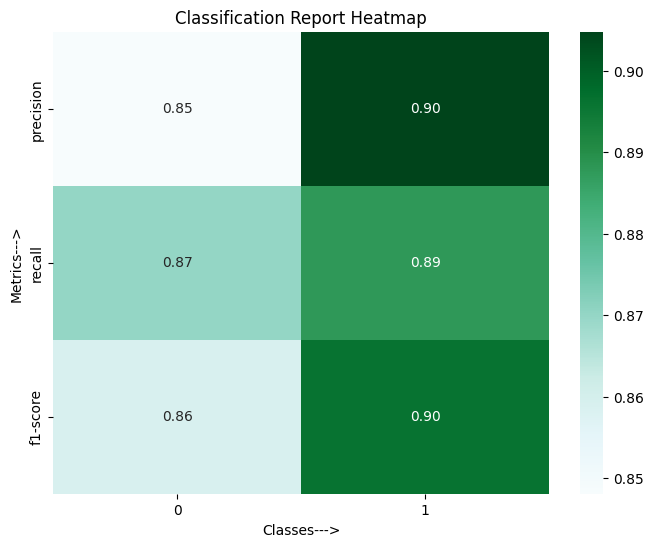

In [63]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_predicted, output_dict=True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report = clf_report.drop(columns=['support'])
plt.figure(figsize=(8, 6))
sns.heatmap(clf_report.iloc[:-3, :].T, annot=True, cmap='BuGn', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.ylabel('Metrics--->')
plt.xlabel('Classes--->')
plt.show()

This cell creates a copy of the processed test features (`X_test_processed`) and assigns it to a new DataFrame called `X_shap`. This is done to prepare the data specifically for SHAP (SHapley Additive exPlanations) value calculation, ensuring the original test data remains untouched.

In [64]:
X_shap = X_test_processed.copy()

This cell reorders the columns of the `X_shap` DataFrame to match the feature order that the trained Random Forest model (`rf_best`) expects. This step is crucial for SHAP calculations, as some explanation methods require the features to be in the same order as they were during model training to correctly attribute importance.

In [65]:
X_shap = X_shap[rf_best.feature_names_in_]

This cell utilizes the `shap` library to generate explanations for the Random Forest model's predictions.
- `shap.TreeExplainer(rf_best)`: Initializes a SHAP explainer for tree-based models like Random Forest.
- `shap_values = explainer.shap_values(X_shap)`: Calculates the SHAP values for the test data (`X_shap`). These values represent the contribution of each feature to the model's prediction for each instance.
- The code then extracts SHAP values for the positive class (HeartDisease=1).
- `shap.summary_plot(shap_vals, X_shap, plot_type="bar", show=False)`: Generates a bar plot summarizing the overall feature importance based on mean absolute SHAP values.
- `shap.summary_plot(shap_vals, X_shap, show=False)`: Generates a Beeswarm plot, showing how the features influence the model output for each sample.
- `shap.force_plot(...)`: Provides a local explanation for a single instance (the first one in this case, `idx=0`), showing how individual feature values push the prediction from the base value.

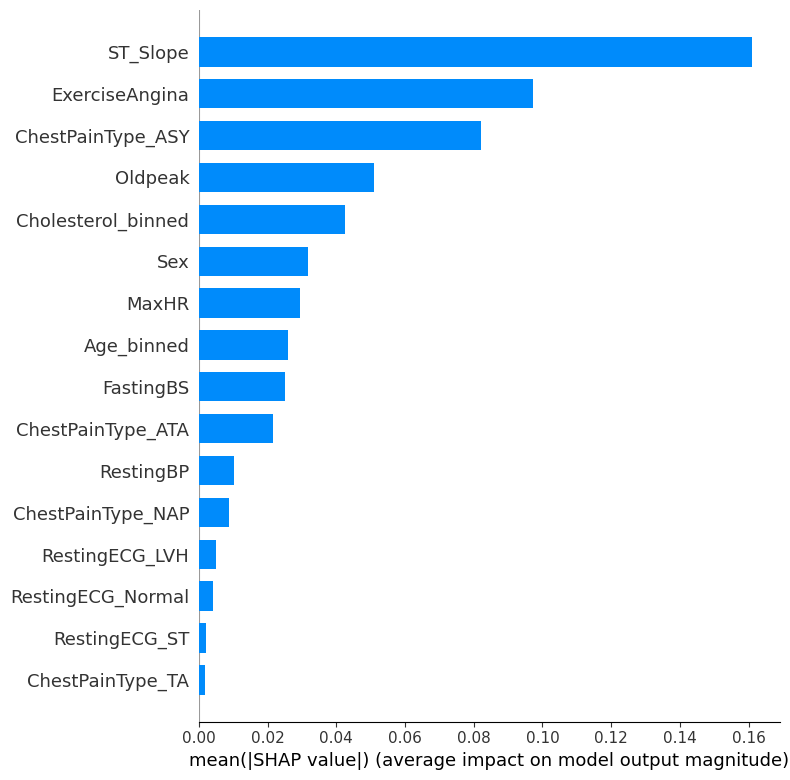

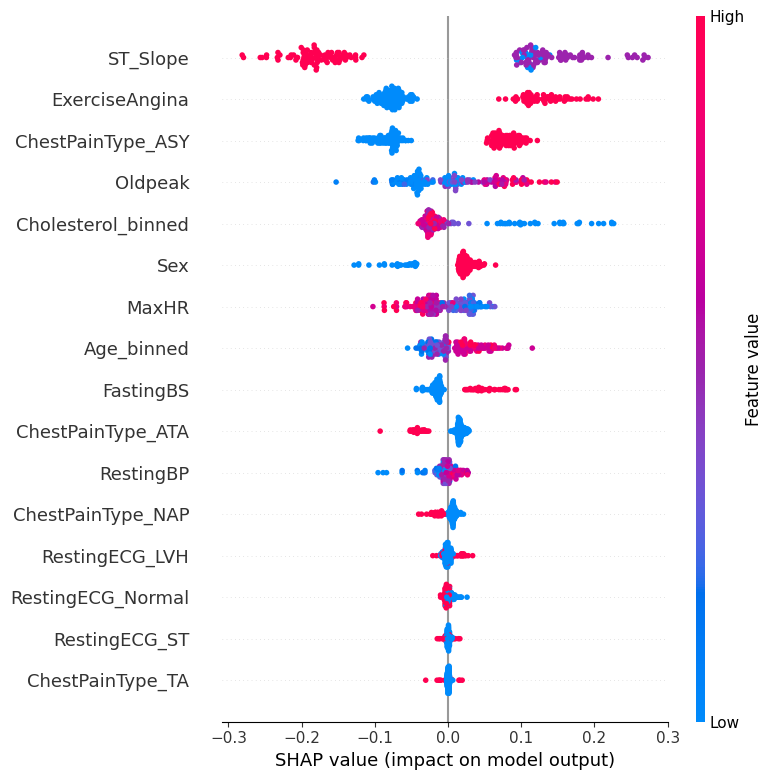

In [66]:
import shap

explainer = shap.TreeExplainer(rf_best)
shap_values = explainer.shap_values(X_shap)

if isinstance(shap_values, list):
    shap_vals = shap_values[1]  # positive class
else:
    shap_vals = shap_values[:, :, 1]

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_vals, X_shap, plot_type="bar", show=False)
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_vals, X_shap, show=False)
plt.show()


# Local explanation (single patient)
idx = 0
shap.force_plot(
    explainer.expected_value[1],
    shap_vals[idx],
    X_shap.iloc[[idx]]
)

This cell saves the trained `rf_best` Random Forest model to a file named 'random_forest_model.pkl' using the `joblib` library. This allows the trained model to be easily loaded and reused later without needing to retrain it, making it convenient for deployment or further analysis.

In [67]:
import joblib
joblib.dump(rf_best, 'random_forest_model.pkl')
print("Optimised Random Forest Model for Heart failure Prediction dumped successfully.")

Optimised Random Forest Model for Heart failure Prediction dumped successfully.
